<a href="https://colab.research.google.com/github/manavgurnani21/data_augmentation_tld_research/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adding Images to Drive Folder

In [7]:
!pip install -q kaggle

from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mbornoe/lisa-traffic-light-dataset
!unzip lisa-traffic-light-dataset.zip

^C
ERROR: Operation cancelled by user


ModuleNotFoundError: No module named 'google.colab'

In [ ]:
import os

# getting current directory
os.getcwd()

all_image_paths = []

## Getting Day Sequence Paths

In [ ]:
# getting all paths for content layer
content = os.listdir('/content/')
content.sort()
content = content[:-3]
content.remove('.config')
content.remove('kaggle.json')
content.remove('lisa-traffic-light-dataset.zip')
content.remove('Annotations')
content.remove('dayTrain')
content.remove('nightTrain')
for folder in content:
  if folder == '.ipynb_checkpoints':
    content.remove('.ipynb_checkpoints')
print(content)

['content', 'daySequence1', 'daySequence2', 'drive', 'nightSequence1', 'nightSequence2', 'sample-dayClip6', 'sample-nightClip1', 'sample_data']


In [ ]:
for folder in content:
  print('/content/' + folder + '/' + folder + '/frames/')
  list = os.listdir('/content/' + folder + '/' + folder + '/frames/')
  for path in list:
    all_image_paths.append('/content/' + folder + '/' + folder + '/frames/' + path)

/content/content/content/frames/


FileNotFoundError: ignored

## Getting Clip Paths

In [ ]:
train_paths = ['/content/dayTrain/dayTrain/', '/content/nightTrain/nightTrain/']
for path in train_paths:
  list1 = os.listdir(path)
  if '.DS_Store' in list1:
    list1.remove('.DS_Store')
  for name in list1:
    list2 = os.listdir(path + name + '/frames/')
    for item in list2:
      all_image_paths.append(path + name + '/frames/' + item)

# Adding All Annotations

## Getting all Sequence Annotations

In [ ]:
import os

all_annotation_paths = []

In [ ]:
root_path = '/content/Annotations/Annotations'
main = os.listdir(root_path)
main.remove('dayTrain')
main.remove('nightTrain')

for folder in main:
  list1 = os.listdir(root_path + '/' + folder)
  list1[0] = folder + list1[0]
  os.rename(root_path + folder + '/frameAnnotationsBOX.csv', root_path + folder + '/' + list1[0])
  all_annotation_paths.append(root_path + folder + '/' + list1[0])

## Getting all Clip Annotations

In [ ]:
clipPaths = [root_path + 'dayTrain/', root_path + 'nightTrain/']

for folder in clipPaths:
  list2 = os.listdir(folder)
  for name in list2:
    list3 = os.listdir(folder + name)
    list3[0] = name + list3[0]
    print(folder + name + '/' + list3[0])
    os.rename(folder + name + '/frameAnnotationsBOX.csv', folder + name + '/' + list3[0])
    all_annotation_paths.append(folder + name + '/' + list3[0])

# Sorting All Lists

In [ ]:
import numpy as np
image_paths = np.asarray(all_image_paths)
sorted_image_paths = np.sort(image_paths)
print(sorted_image_paths)

annotation_paths = np.asarray(all_annotation_paths)
sorted_annotation_paths = np.sort(annotation_paths)
print(sorted_annotation_paths)

# Cropping the Images

In [ ]:
def findIndexofElement(value, array):
  for i in range(len(array)):
    if array[i][array[i].rfind('/'):] == value:
      return i
      break

In [ ]:
os.mkdir('/content/allCroppedImages/')
os.mkdir('/content/allCroppedImages/stop/')
os.mkdir('/content/allCroppedImages/warning/')
os.mkdir('/content/allCroppedImages/go/')
os.mkdir('/content/allCroppedImages/warningLeft/')
os.mkdir('/content/allCroppedImages/goLeft/')
os.mkdir('/content/allCroppedImages/stopLeft/')
os.mkdir('/content/allCroppedImages/goForward/')

In [ ]:
from google.colab.patches import cv2_imshow
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import array_to_img
from tensorflow.keras.utils import load_img
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import os

def cropAllImages(path):
  df = pd.read_csv(path, sep=';')
  filenames = df['Filename']
  leftX = np.asarray(df['Upper left corner X'])
  rightX = np.asarray(df['Lower right corner X'])
  leftY = np.asarray(df['Upper left corner Y'])
  rightY = np.asarray(df['Lower right corner Y'])
  tag = np.asarray(df['Annotation tag'])

  image_saved_counter = 0

  # loc_index is the location of the image path in all sorted paths
  for i in range(len(filenames)):
    findIndexofElement(filenames[i][filenames[i].rfind('/'):], sorted_image_paths)
    img = img_to_array(load_img(sorted_image_paths[findIndexofElement(filenames[i][filenames[i].rfind('/'):], sorted_image_paths)]))
    crop_img = array_to_img(img[leftY[i]:rightY[i], leftX[i]:rightX[i]])
    # inputting them in folder
    crop_img.save('/content/allCroppedImages/' + tag[i] + filenames[i][filenames[i].rfind('/'):])
    image_saved_counter+=1
    if(image_saved_counter%1000==0):
      print(image_saved_counter)

# for path in all_annotation_paths:
#   cropAllImages(path)

In [ ]:
# from google.colab import files
# !zip -r '/content/"allCroppedImages.zip"' '/content/allCroppedImages'
# files.download('/content/allCroppedImages.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Randomly Assigning Files

- after putting into sub-folders
- for each subfolder:
  - put all names in a list
  - shuffle
  - get all three indices
  - put into train, test, val

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
!unzip '/content/drive/MyDrive/cropped_images_randomized/cropped_images_randomized.zip' -d '/content/'

In [ ]:
# import os

# os.mkdir('/content/train/')
# os.mkdir('/content/test/')
# os.mkdir('/content/val/')

# folderList = ['train', 'test', 'val']
# for name in folderList:
#   os.mkdir('/content/' + name + '/stop/')
#   os.mkdir('/content/' + name + '/go/')
#   os.mkdir('/content/' + name + '/warning/')
#   os.mkdir('/content/' + name + '/warningLeft/')
#   os.mkdir('/content/' + name + '/goLeft/')
#   os.mkdir('/content/' + name + '/stopLeft/')
#   os.mkdir('/content/' + name + '/goForward/')

In [ ]:
# import random
# import shutil
# import pandas as pd
# import numpy as np

# def shuffleSelection(path):
#   allFolders = listPaths(path)
#   for folder in allFolders:
#     df = pd.DataFrame(listPaths(folder))
#     trainPaths, testPaths, valPaths = np.split(df, [int(.8 * len(df)), int(.9 * len(df))])
#     moveToFolder(trainPaths, testPaths, valPaths)

# def moveToFolder(trainPaths, testPaths, valPaths):
#   finalTrainPathList = np.asarray(trainPaths[0])
#   type(finalTrainPathList)
#   finalTestPathList = np.asarray(testPaths[0])
#   finalValPathList = np.asarray(valPaths[0])
#   for path in finalTrainPathList:
#     shutil.move(path[:-1], '/content/train' + path[33:-1])
#   for path in finalTestPathList:
#     shutil.move(path[:-1], '/content/test' + path[33:-1])
#   for path in finalValPathList:
#     shutil.move(path[:-1], '/content/val' + path[33:-1])

In [ ]:
# shuffleSelection('/content/content/allCroppedImages/')

In [ ]:
# from google.colab import files
# !zip -r '/content/cropped_images_randomized.zip' '/content/cropped_images_randomized'
# files.download('/content/cropped_images_randomized.zip')

In [77]:
# import os, shutil
# folder = '/Users/manavgurnani21/Downloads/content/all_images_randomized/val/warningLeft'
# for filename in os.listdir(folder):
#     file_path = os.path.join(folder, filename)
#     try:
#         if os.path.isfile(file_path) or os.path.islink(file_path):
#             os.unlink(file_path)
#         elif os.path.isdir(file_path):
#             shutil.rmtree(file_path)
#     except Exception as e:
#         print('Failed to delete %s. Reason: %s' % (file_path, e))

In [84]:
import os, shutil

# setting paths
folder_raw = '/Users/manavgurnani21/Downloads/cropped_images_raw/'
folder_augmented = '/Users/manavgurnani21/Downloads/content/cropped_images_randomized/'
folder_final = '/Users/manavgurnani21/Downloads/content/all_images_randomized/'

# used to get paths of all folders we are going to move into the big folder
all_sub_paths = []

# all class names
all_class_names = ['go', 'stopLeft', 'warningLeft', 'goForward', 'stop', 'warning', 'goLeft']

# for file in os.listdir(folder_raw):
#     print(file)

# getting paths of all sub  folders to copy
for filename in os.listdir(folder_raw):
    if '.DS_Store' not in filename:
        file_path = os.path.join(folder_raw, filename)
        for classifier in os.listdir(file_path):
            if '.DS_Store' not in classifier:
                all_sub_paths.append(os.path.join(file_path, classifier))

for filename in os.listdir(folder_augmented):
    if '.DS_Store' not in filename:
        file_path = os.path.join(folder_augmented, filename)
        for classifier in os.listdir(file_path):
            if '.DS_Store' not in classifier:
                all_sub_paths.append(os.path.join(file_path, classifier))

# creating base test train val folders
# os.mkdir('/Users/manavgurnani21/Downloads/content/all_images_randomized/train')
# os.mkdir('/Users/manavgurnani21/Downloads/content/all_images_randomized/test')
# os.mkdir('/Users/manavgurnani21/Downloads/content/all_images_randomized/val')

# for folder in os.listdir(folder_final):
#     for name in all_class_names:
#         os.mkdir(folder_final + folder + '/' + name)

for item in all_sub_paths:
    for image in os.listdir(item):
        directories = item.split('/')
        src = item + '/' + image
        dst = folder_final + directories[-2] + '/' + directories[-1] + '/'
        shutil.copy2(src, dst)

# Training Dataset

In [ ]:
# There are several ways you can enhance your image detection model:

# Use a more powerful model architecture: There are many different model architectures that can be used for image detection, such as VGG, ResNet, and Inception. Using a more powerful architecture can help your model learn more discriminative features and improve performance.

# Fine-tune a pre-trained model: Pre-trained models have already been trained on a large dataset and can be fine-tuned for your specific task. Fine-tuning can help your model learn task-specific features and improve performance.

# Use transfer learning: Transfer learning involves using the features learned by a pre-trained model and applying them to a new task. This can be an effective way to improve performance on a new task, particularly if you have a limited amount of training data.

# Experiment with different hyperparameters: Hyperparameters are settings that determine the model's behavior and performance. You can try tuning different hyperparameters, such as the learning rate, batch size, and optimization algorithm, to see if they have an impact on your model's performance.

In [117]:
import random

def listPaths(path):
  pathList = []
  for folder in os.listdir(path):
    if folder == '.ipynb_checkpoints':
      continue
    pathList.append(path + '/' + folder)
  return pathList

print(listPaths('/Users/manavgurnani21/Downloads/content/cropped_images_randomized/test'))

['/Users/manavgurnani21/Downloads/content/cropped_images_randomized/test/go', '/Users/manavgurnani21/Downloads/content/cropped_images_randomized/test/.DS_Store', '/Users/manavgurnani21/Downloads/content/cropped_images_randomized/test/stopLeft', '/Users/manavgurnani21/Downloads/content/cropped_images_randomized/test/warningLeft', '/Users/manavgurnani21/Downloads/content/cropped_images_randomized/test/goForward', '/Users/manavgurnani21/Downloads/content/cropped_images_randomized/test/stop', '/Users/manavgurnani21/Downloads/content/cropped_images_randomized/test/warning', '/Users/manavgurnani21/Downloads/content/cropped_images_randomized/test/goLeft']


In [9]:
# importing the modules
import os
import shutil

# Providing the folder path
origin = '/Users/manavgurnani21/Downloads/content 2/cropped_images_non_augmented/train/go/'
target = '/Users/manavgurnani21/Downloads/content/cropped_images_randomized/train/go/'

# Fetching the list of all the files
files = os.listdir(origin)

shutil.copy2(origin, '/Users/manavgurnani21/Downloads/GitHub/data_augmentation_tld_research/random')

print(files)

IsADirectoryError: [Errno 21] Is a directory: '/Users/manavgurnani21/Downloads/content 2/cropped_images_non_augmented/train/go/'

In [97]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

train_data_dir = '/Users/manavgurnani21/Downloads/content/all_images_randomized/train'
test_data_dir = '/Users/manavgurnani21/Downloads/content/all_images_randomized/test'
val_data_dir = '/Users/manavgurnani21/Downloads/content/all_images_randomized/val'
 
img_height = 180
img_width = 180
batch_size= 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_data_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_data_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  val_data_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 81514 files belonging to 7 classes.
Found 10192 files belonging to 7 classes.
Found 10196 files belonging to 7 classes.


In [98]:
class_names = train_ds.class_names
print(class_names)

['go', 'goForward', 'goLeft', 'stop', 'stopLeft', 'warning', 'warningLeft']


In [99]:
normalization_layer = layers.Rescaling(1./255)

In [100]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


# Neural Networks

In [102]:
import matplotlib.pylab as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

## ResNet 50

Accuracy: 0.34203296703296704

In [103]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=7,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(7, activation='softmax'))

## MobileNetV2

Accuracy: 0.31456043956043955

In [7]:
# mobilenet_v2 = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
# mobile_net_layers = hub.KerasLayer(mobilenet_v2, input_shape=(224,224,3))
# mobile_net_layers.trainable = False
# neural_net = tf.keras.Sequential([mobile_net_layers, tf.keras.layers.Dropout(0.3), tf.keras.layers.Dense(7,activation='softmax')])

## RegNet

## EfficientNet

In [104]:
resnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dense_3 (Dense)             (None, 7)                 3591      
                                                                 
Total params: 24,640,391
Trainable params: 1,052,679
Non-trainable params: 23,587,712
_________________________________________________________________


In [105]:
# vgg_model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

resnet_model.compile(optimizer='Adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [106]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

resnet_history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10,
  callbacks=[callback]
)

Epoch 1/10


/Users/manavgurnani21/anaconda3/lib/python3.9/site-packages/keras/backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2548/2548 [==============================] - 2294s 900ms/step - loss: 0.2492 - accuracy: 0.9134 - val_loss: 0.0837 - val_accuracy: 0.9678
Epoch 2/10
2548/2548 [==============================] - 2162s 848ms/step - loss: 0.1471 - accuracy: 0.9454 - val_loss: 0.0811 - val_accuracy: 0.9682
Epoch 3/10
2548/2548 [==============================] - 2082s 817ms/step - loss: 0.1180 - accuracy: 0.9556 - val_loss: 0.0602 - val_accuracy: 0.9794
Epoch 4/10
2548/2548 [==============================] - 2061s 809ms/step - loss: 0.0968 - accuracy: 0.9638 - val_loss: 0.0634 - val_accuracy: 0.9792
Epoch 5/10
2548/2548 [==============================] - 2057s 807ms/step - loss: 0.0822 - accuracy: 0.9687 - val_loss: 0.0631 - val_accuracy: 0.9774
Epoch 6/10
2548/2548 [==============================] - 2062s 809ms/step - loss: 0.0734 - accuracy: 0.9720 - val_loss: 0.0729 - val_accuracy: 0.9792
Epoch 7/10
2548/2548 [==============================] - 2057s 807ms/step - loss: 0.0658 - accuracy: 0.9747 - val_loss

In [107]:
print(len(resnet_history.history['loss']))

10


In [ ]:
# resnet_model = keras.models.load_model('/Users/manavgurnani21/Downloads/Trained_Models/Experiment_3')

In [108]:
pred=resnet_history.model.predict(test_ds)
print(pred[0])

319/319 [==============================] - 236s 739ms/step
[3.5913050e-11 5.5638903e-19 9.2638352e-16 9.9988425e-01 2.8380089e-06
 1.1286764e-04 5.2555308e-12]


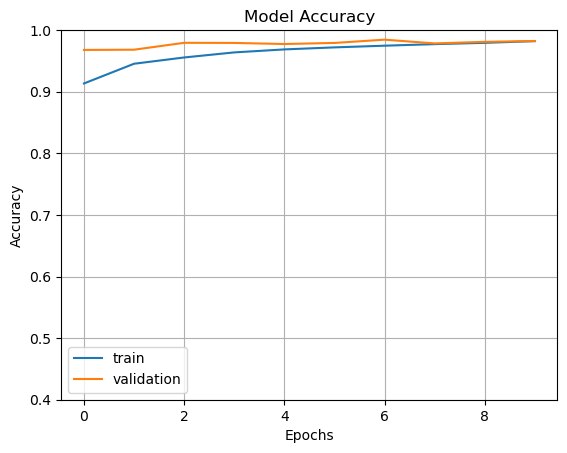

In [109]:
fig1 = plt.gcf()
plt.plot(resnet_history.history['accuracy'])
plt.plot(resnet_history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [118]:
import os
all_image_path_test = []

for folder in listPaths('/Users/manavgurnani21/Downloads/content/all_images_randomized/test'):
    if folder != '/Users/manavgurnani21/Downloads/content/all_images_randomized/test/.DS_Store':
        for file in listPaths(folder):
            all_image_path_test.append(file.split('/')[-2])

print(len(all_image_path_test))

10192


In [119]:
import numpy as np
pred_np = np.asarray(pred)

i = 0
correct = 0
for image_output in pred_np:
    predicted_class_name = class_names[np.argmax(image_output)]
    if(predicted_class_name == all_image_path_test[i]):
        correct += 1
    i += 1

print(i)
accuracy = correct / len(all_image_path_test)

print("The accuracy of this model is:", accuracy)

10192
The accuracy of this model is: 0.3170133437990581


In [ ]:
# from keras.models import save_model

# keras.models.save_model(resnet_model,'/Users/manavgurnani21/Downloads/Trained_Models/Experiment_16')

## Agenda for 10/18

- sort out issue with random shuffle function (ask about cropping time)
- find way to convert images to dataset
  - ask why we need singular class folders

Goals for the next two weeks:
- run experiments (and caputre results)
- finish research paper

# Data Augmentation

In [ ]:
# import required module
import os
import cv2
import numpy as np

def applyTransformation(directory):
    # iterate over files in
    # that directory
    for root, dirs, files in os.walk(directory):
        for filename in files:
            if(filename.__contains__('.DS_Store') == False):
                img2 = cv2.imread(os.path.join(root, filename))
                new = specification(os.path.join(root, filename))
                new_2 = histogram_equalization(new)
                new_3 = log_inverse(new_2)
                new_4 = gamma(new_3, 0.25)
                cv2.imwrite(os.path.join(root, filename), new_4)

applyTransformation('/Users/manavgurnani21/Downloads/content/cropped_images_randomized/train')

/var/folders/6k/yg9y73qs2hz37v5r2l39pt0m0000gn/T/ipykernel_6612/1493919654.py:12: FutureWarning: `multichannel` is a deprecated argument name for `match_histograms`. It will be removed in version 1.0. Please use `channel_axis` instead.
  matched = match_histograms(image, reference, multichannel=True)
/var/folders/6k/yg9y73qs2hz37v5r2l39pt0m0000gn/T/ipykernel_6612/1285761232.py:3: RuntimeWarning: divide by zero encountered in log
  log_image = c * (np.log(image + 1))


## Experiment 1: Hist. Equalization

In [ ]:
import cv2
import numpy as np

def histogram_equalization(img_in):
# segregate color streams
    b,g,r = cv2.split(img_in)
    h_b, bin_b = np.histogram(b.flatten(), 256, [0, 256])
    h_g, bin_g = np.histogram(g.flatten(), 256, [0, 256])
    h_r, bin_r = np.histogram(r.flatten(), 256, [0, 256])
# calculate cdf    
    cdf_b = np.cumsum(h_b)  
    cdf_g = np.cumsum(h_g)
    cdf_r = np.cumsum(h_r)
    
# mask all pixels with value=0 and replace it with mean of the pixel values 
    cdf_m_b = np.ma.masked_equal(cdf_b,0)
    cdf_m_b = (cdf_m_b - cdf_m_b.min())*255/(cdf_m_b.max()-cdf_m_b.min())
    cdf_final_b = np.ma.filled(cdf_m_b,0).astype('uint8')
  
    cdf_m_g = np.ma.masked_equal(cdf_g,0)
    cdf_m_g = (cdf_m_g - cdf_m_g.min())*255/(cdf_m_g.max()-cdf_m_g.min())
    cdf_final_g = np.ma.filled(cdf_m_g,0).astype('uint8')
    cdf_m_r = np.ma.masked_equal(cdf_r,0)
    cdf_m_r = (cdf_m_r - cdf_m_r.min())*255/(cdf_m_r.max()-cdf_m_r.min())
    cdf_final_r = np.ma.filled(cdf_m_r,0).astype('uint8')
# merge the images in the three channels
    img_b = cdf_final_b[b]
    img_g = cdf_final_g[g]
    img_r = cdf_final_r[r]
  
    img_out = cv2.merge((img_b, img_g, img_r))
# validation
    equ_b = cv2.equalizeHist(b)
    equ_g = cv2.equalizeHist(g)
    equ_r = cv2.equalizeHist(r)
    equ = cv2.merge((equ_b, equ_g, equ_r))
    #print(equ)
    #cv2.imwrite('output_name.png', equ)
    return img_out

## Experiment 2: Logarithm and Inverse

In [ ]:
def log_inverse(image):
    c = 255 / np.log(1 + np.max(image))
    log_image = c * (np.log(image + 1))
    
    # Specify the data type so that
    # float value will be converted to int
    log_image = np.array(log_image, dtype = np.uint8)

    img = cv2.cvtColor(log_image, cv2.COLOR_BGR2RGB)
    colored_negative = abs(255-img)
    return colored_negative

## Experiment 3: Gamma

In [ ]:
def gamma(src, gamma):
    invGamma = 1 / gamma

    table = [((i / 255) ** invGamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)

    return cv2.LUT(src, table)

## Experiment 4: Specification

In [ ]:
import matplotlib.pyplot as plt
import cv2
from skimage import data
from skimage import exposure
from skimage.exposure import match_histograms
from PIL import Image

def specification(path):
    reference_unsized = cv2.cvtColor(cv2.imread('/Users/manavgurnani21/Downloads/content/cropped_images_randomized/Colour-Wheel-Rainbow-Spectrum-Color-Wheel-1740381.jpg'), cv2.COLOR_BGR2RGB)
    image = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
    reference = cv2.resize(reference_unsized, (image.shape[1], image.shape[0]))
    matched = match_histograms(image, reference, multichannel=True)
    return matched